# Visualize Conserved Regions detected by fastANI

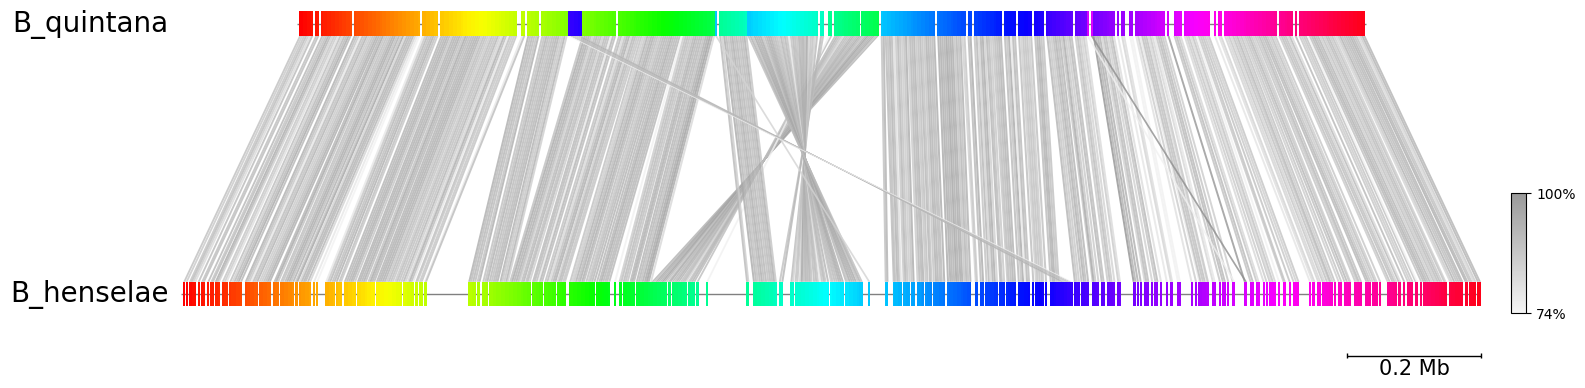

In [1]:
import csv
import numpy as np
from pathlib import Path

from Bio import SeqIO
from pygenomeviz import GenomeViz
from pygenomeviz.utils import ColorCycler

COLORMAP = "hsv"  # "hsv", "viridis", "jet", etc...
LINK_COLOR = "grey"
CURVE = False

# Resource files for visualization
genome_fasta_file1 = Path("./B_quintana.fna")
genome_fasta_file2 = Path("./B_henselae.fna")
fastani_visual_file = Path("./fastani.out.visual")

# Load genome fasta information
genome_name1 = genome_fasta_file1.with_suffix("").name
genome_name2 = genome_fasta_file2.with_suffix("").name
seq_length1 = len(next(SeqIO.parse(genome_fasta_file1, "fasta")))
seq_length2 = len(next(SeqIO.parse(genome_fasta_file2, "fasta")))

# Load fastANI visual result
fastani_results = []
with open(fastani_visual_file) as f:
    reader = csv.reader(f, delimiter="\t")
    for row in reader:
        start1, end1 = int(row[6]), int(row[7])
        start2, end2 = int(row[8]), int(row[9])
        identity = float(row[2])
        link1, link2 = (genome_name1, start1, end1), (genome_name2, start2, end2)
        fastani_results.append((link1, link2, identity))

# Visualize conserved regions detected by fastANI
gv = GenomeViz(
    fig_width=15,
    fig_track_height=1.0,
    feature_track_ratio=0.1,
    tick_track_ratio=0.2,
    align_type="center",  # "left", "center", "right"
    tick_style="bar",  # "axis", "bar", None
    plot_size_thr=0,
)
track1 = gv.add_feature_track(genome_name1, seq_length1)
track2 = gv.add_feature_track(genome_name2, seq_length2)

ColorCycler.set_cmap(COLORMAP)  # "hsv", "viridis", "jet", etc...
colormap, data_num = ColorCycler.cmap, len(fastani_results)
colors = [colormap(int(i)) for i in np.linspace(0, colormap.N, data_num)]

min_identity = int(min([res[2] for res in fastani_results]))
for res, color in zip(fastani_results, colors):
    link1, link2, identity = res
    track1.add_feature(link1[1], link1[2], plotstyle="bigbox", facecolor=color)
    track2.add_feature(link2[1], link2[2], plotstyle="bigbox", facecolor=color)
    gv.add_link(link1, link2, LINK_COLOR, v=identity, vmin=min_identity, curve=CURVE)

fig = gv.plotfig()

gv.set_colorbar(
    fig, bar_colors=[LINK_COLOR], vmin=min_identity, bar_height=0.3, bar_bottom=0.2
)